<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 7.6 MB/s 
     |████████████████████████████████| 9.8 MB 55.7 MB/s 
     |████████████████████████████████| 718 kB 46.1 MB/s 
     |████████████████████████████████| 11.2 MB 51.0 MB/s 
     |████████████████████████████████| 930 kB 53.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 49 kB 3.9 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
Y
Y
Y
yes
y
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640129 sha256=13d526c3f630a0ebc5627a5756ff9f376107ec9618d8fc7e85598b5d6a3dd3f1
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 9.1 MB/s 
     |████████████████████████████████| 

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [3]:
# скачаем данные
#!wget https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Brent%20Spot%20Price.csv
#!wget https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Nuclear%20Capacity.csv

In [4]:
!gdown https://drive.google.com/uc?id=1uZDp1qeD_MkDs4jFMCHFckanXUoYed_-
!gdown https://drive.google.com/uc?id=1EcWVzHe5CvdyvsxssEhRMoy3bw4JJq02

Downloading...
From: https://drive.google.com/uc?id=1uZDp1qeD_MkDs4jFMCHFckanXUoYed_-
To: /content/Nuclear Capacity.csv
100% 118k/118k [00:00<00:00, 33.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EcWVzHe5CvdyvsxssEhRMoy3bw4JJq02
To: /content/Brent Spot Price.csv
100% 6.73k/6.73k [00:00<00:00, 5.70MB/s]


In [5]:
# считаем файлы
# wget не пашет совсем, пришлось вручную файлы кидать
# иной варик - гугл драйв + gdown
ts1 = pd.read_csv('Brent Spot Price.csv')
ts2 = pd.read_csv('Nuclear Capacity.csv')

In [6]:
# Наводим красоту
ts2.rename(columns = {'Unnamed: 0' : 'time', 'U.S. nuclear capacity, daily (Megawatts)': 'data'}, inplace = True)
ts2.head()

,time,data
0,2007 0101 01,101764.9
1,2007 0102 02,101764.9
2,2007 0103 03,101764.9
3,2007 0104 04,101764.9
4,2007 0105 05,101764.9


In [7]:
ts1.rename(columns = {'Unnamed: 0' : 'time', 'Brent crude oil spot price, Monthly (dollars per barrel)': 'data'}, inplace = True)

In [8]:
ts1['time'] = pd.to_datetime(ts1['time'])
ts1.head()

,time,data
0,1990-01-01,21.251
1,1990-02-01,19.813
2,1990-03-01,18.387
3,1990-04-01,16.612
4,1990-05-01,16.352


In [9]:
def change_date(date_string):
  date_string = str(date_string)
  year = date_string[:4]
  month = date_string[5:7]
  day = date_string[7:9]

  return f"{year}-{month}-{day}"

In [10]:
ts2['time'] = ts2['time'].apply(change_date)
ts2['time'] = pd.to_datetime(ts2['time'])

In [11]:
ts2.head()

,time,data
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [12]:
# сделаем разбиение на train/test
train_ratio = 0.8
ts1_train = ts1.iloc[:int(train_ratio*len(ts1))]
ts1_test = ts1.iloc[int(train_ratio*len(ts1)) + 1:]

ts2_train = ts2.iloc[:int((train_ratio)*len(ts2))]
ts2_test = ts2.iloc[int((train_ratio)*len(ts2)) + 1:]

In [13]:
X1_train = ts1_train['time']
y1_train = ts1_train['data']
X1_test = ts1_test['time']
y1_test = ts1_test['data']

X2_train = ts2_train['time']
y2_train = ts2_train['data']
X2_test = ts2_test['time']
y2_test = ts2_test['data']

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

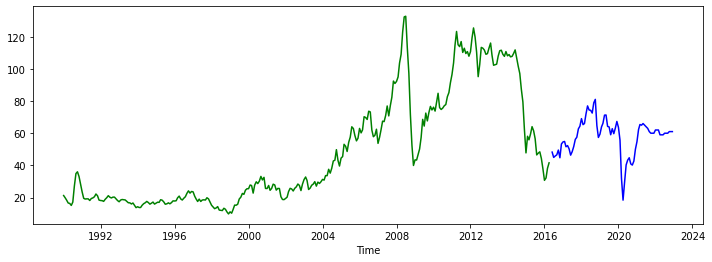

In [14]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, c='green', label='train')
plt.plot(X1_test, y1_test, c='blue', label='test')
plt.xlabel('Time')
plt.show()

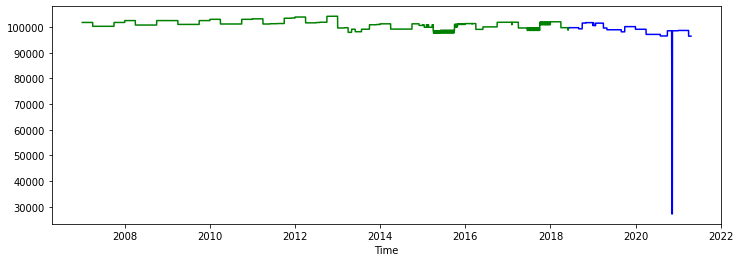

In [15]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X2_train, y2_train, c='green', label='train')
plt.plot(X2_test, y2_test, c='blue', label='test')
plt.xlabel('Time')
plt.show()

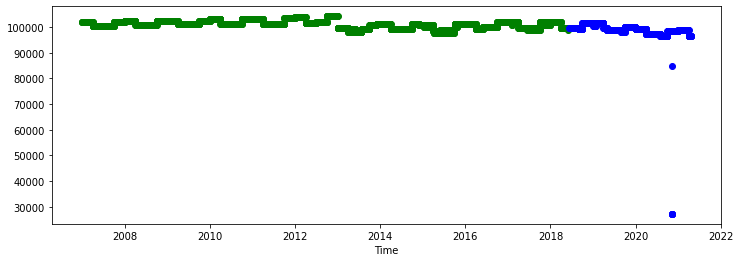

In [16]:
plt.figure(figsize=(12, 4))
plt.scatter(X2_train, y2_train, c='green', label='train')
plt.scatter(X2_test, y2_test, c='blue', label='test')
plt.xlabel('Time')
plt.show()

In [17]:
# Заменим дикий выброс на погрешность поменьше, чтобы не страдать от высокого МАЕ
ts2_test.loc[ts2_test['data'] < 90000, 'data'] = y2_train.mean()

X2_train = ts2_train['time']
y2_train = ts2_train['data']
X2_test = ts2_test['time']
y2_test = ts2_test['data']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


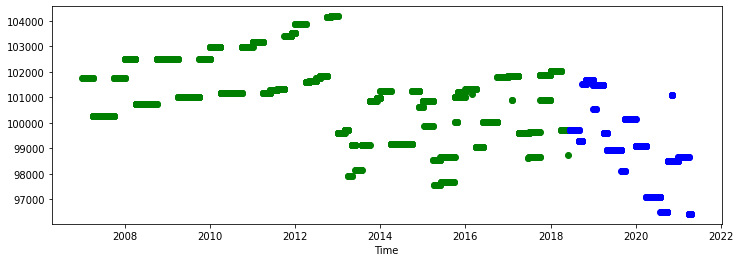

In [18]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.scatter(X2_train, y2_train, c='green', label='train')
plt.scatter(X2_test, y2_test, c='blue', label='test')
plt.xlabel('Time')
plt.show()

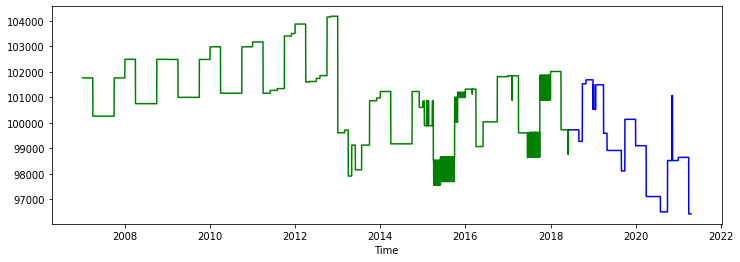

In [19]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(X2_train, y2_train, c='green', label='train')
plt.plot(X2_test, y2_test, c='blue', label='test')
plt.xlabel('Time')
plt.show()

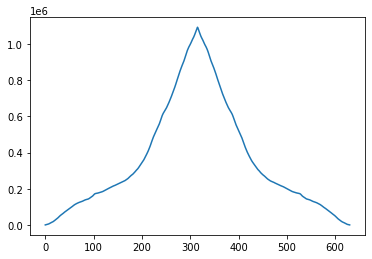

In [20]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
plt.plot(np.correlate(y1_train, y1_train, mode='full'))

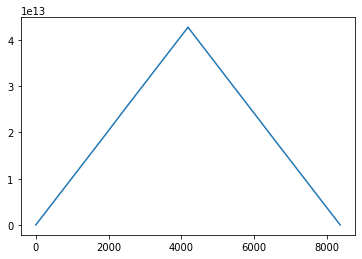

In [21]:
plt.plot(np.correlate(y2_train, y2_train, mode='full'))

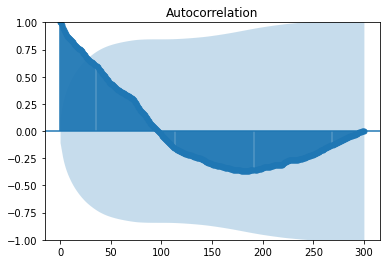

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y1_train, lags=300)
plt.show()

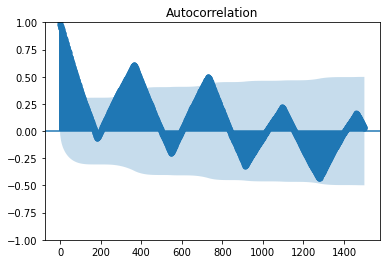

In [23]:
plot_acf(y2_train, lags=1500)
plt.show()

Первый ряд скорее всего не обладает сезонностью, а вот во втором она есть и скорее всего приблизительно равна году.

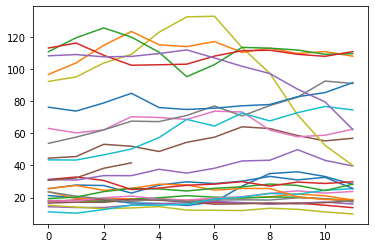

In [24]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными
for i in range(1, round(len(y1_train) / 12) + 1):
  if i == round(len(y1_train) / 12):
    plt.plot(range(len(y1_train[12 * i:])), y1_train[12 * i:])
  else:
    plt.plot(range(12), y1_train[12 * (i - 1): 12 * i])

plt.show()

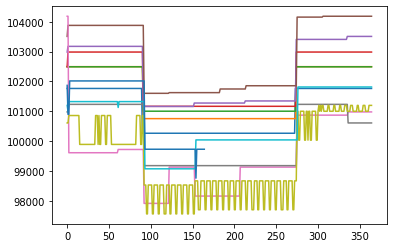

In [25]:
for i in range(1, round(len(y2_train) / 365) + 1):
  if i == round(len(y2_train) / 365):
    plt.plot(range(len(y2_train[365 * i:])), y2_train[365 * i:])
  else:
    plt.plot(range(365), y2_train[365 * (i - 1): 365 * i])

plt.show()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [26]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
model_naive_1 = NaiveForecaster(strategy='last')
model_naive_1.fit(y1_train)

NaiveForecaster()

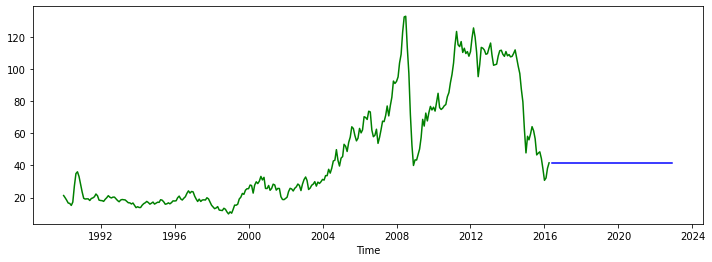

In [27]:
y_pred_naive_1 = model_naive_1.predict(X1_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, c='green', label='train')
plt.plot(X1_test, y_pred_naive_1, c='blue', label='test')
plt.xlabel('Time')
plt.show()

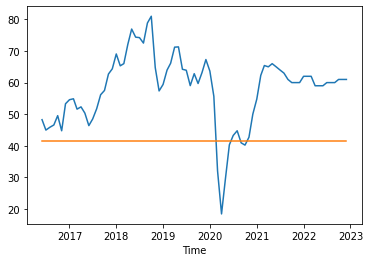

In [28]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_naive_1)
plt.xlabel('Time')
plt.show()

In [29]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error

print(f"Naive 1 MAE = {mean_absolute_error(y1_test, y_pred_naive_1)}")

Naive 1 MAE = 17.6502911392405


Как видим, такой константый прогноз не особо хорошо выполнил задачу

In [30]:
# ваш код обучения моделей здесь
model_naive_2 = NaiveForecaster(strategy='last', sp=12)
model_naive_2.fit(y1_train)

NaiveForecaster(sp=12)

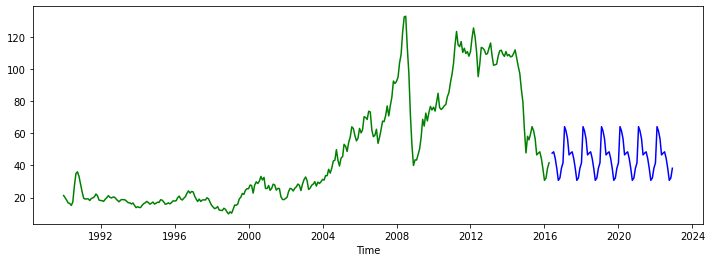

In [31]:
y_pred_naive_2 = model_naive_2.predict(X1_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, c='green', label='train')
plt.plot(X1_test, y_pred_naive_2, c='blue', label='test')
plt.xlabel('Time')
plt.show()

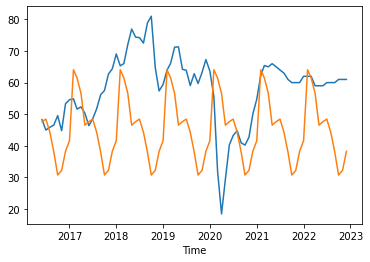

In [32]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_naive_2)
plt.xlabel('Time')
plt.show()

In [33]:
print(f"Naive 2 MAE = {mean_absolute_error(y1_test, y_pred_naive_2)}")

Naive 2 MAE = 16.21681012658227


Уже получше

In [34]:
# extra
model_naive_2_2 = NaiveForecaster(strategy="mean", window_length=20, sp=12)
model_naive_2_2.fit(y1_train)

NaiveForecaster(sp=12, strategy='mean', window_length=20)

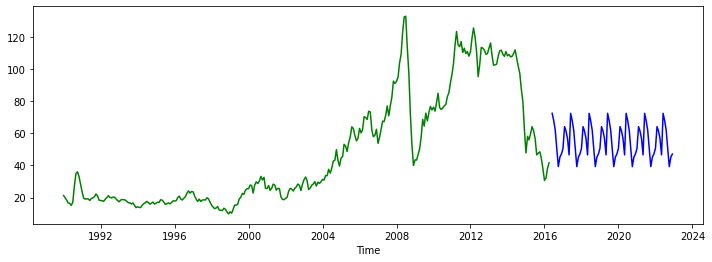

In [35]:
y_pred_naive_2_2 = model_naive_2_2.predict(X1_test.index)

plt.figure(figsize=(12, 4))
plt.plot(X1_train, y1_train, c='green', label='train')
plt.plot(X1_test, y_pred_naive_2_2, c='blue', label='test')
plt.xlabel('Time')
plt.show()

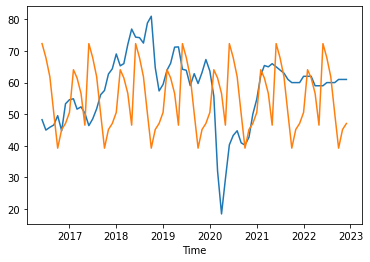

In [36]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_naive_2_2)
plt.xlabel('Time')
plt.show()

In [37]:
print(f"Naive 2 MAE = {mean_absolute_error(y1_test, y_pred_naive_2_2)}")

Naive 2 MAE = 12.378949367088607


Со средним за период еще лучше

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [38]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
arima = ARIMA(order=(1,1,1), seasonal_order=(1,0,0, 12))
arima.fit(y1_train)

ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))

In [39]:
# посчитайте метрики на test
y_pred_arima = arima.predict(X1_test.index)
print(f"ARIMA MAE = {mean_absolute_error(y1_test, y_pred_arima)}")

ARIMA MAE = 9.507404851885362


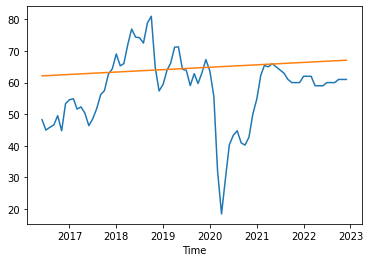

In [40]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_arima)
plt.xlabel('Time')
plt.show()

In [41]:
auto_arima = AutoARIMA(test = 'kpss')
auto_arima.fit(y1_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AutoARIMA()

In [42]:
y_pred_autoarima = auto_arima.predict(X1_test.index)
print(f"AutoARIMA MAE = {mean_absolute_error(y1_test, y_pred_autoarima)}")

AutoARIMA MAE = 15.865891185322445


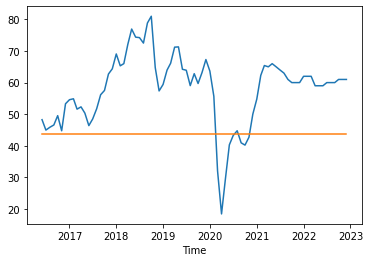

In [43]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_autoarima)
plt.xlabel('Time')
plt.show()

Тут автоарима, к сожалению, выдала результат похуже. Визуально арима модель шла по верхней части графика, не обращая внимаю на падение, а вот автоарима решила это падение учесть.

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [44]:
#from orbit.models.lgt import LGTFull
#from orbit.models.dlt import DLTFull
from orbit.models import LGT
from orbit.models import DLT


# ваш код обучения моделей здесь
lgt = LGT(response_col='data', date_col='time', seasonality=12, seed=123)
lgt.fit(ts1_train)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [45]:
# посчитайте метрики на test
y_pred_lgt = lgt.predict(ts1_test)

In [46]:
mean_absolute_error(y_pred_lgt['prediction'], y1_test)

9.923642307004943

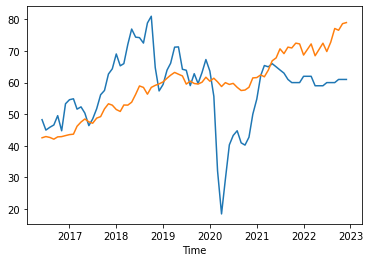

In [47]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_lgt['prediction'])
plt.xlabel('Time')
plt.show()

На самом деле все неплохо до 2020го года, описывается некий тренд на повышение.

In [48]:
dlt = DLT(response_col='data', date_col='time', seasonality=12, seed=123)
dlt.fit(ts1_train)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [49]:
y_pred_dlt = dlt.predict(ts1_test)

In [50]:
mean_absolute_error(y_pred_dlt['prediction'], y1_test)

15.528114820349117

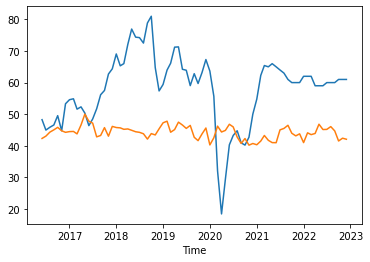

In [51]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_dlt['prediction'])
plt.xlabel('Time')
plt.show()

А тут кажется dlt было похуже

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [52]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь
exp_smoothing = ExponentialSmoothing(sp = 12)
exp_smoothing.fit(y1_train)

ExponentialSmoothing(sp=12)

In [53]:
# посчитайте метрики на test
y_pred_exp_smoothing = exp_smoothing.predict(X1_test.index)

In [54]:
mean_absolute_error(y1_test, y_pred_exp_smoothing)

17.650291181867445

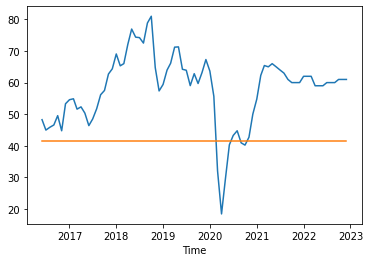

In [55]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_exp_smoothing)
plt.xlabel('Time')
plt.show()

Ну тут уж как-то слишком плоховато

In [56]:
auto_ets = AutoETS(sp = 12)
auto_ets.fit(y1_train)

AutoETS(sp=12)

In [57]:
y_pred_auto_ets = auto_ets.predict(X1_test.index)

In [58]:
mean_absolute_error(y1_test, y_pred_auto_ets)

17.65057725492227

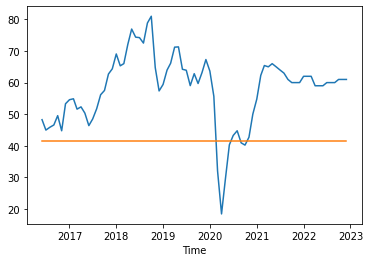

In [59]:
plt.plot(X1_test, y1_test)
plt.plot(X1_test, y_pred_auto_ets)
plt.xlabel('Time')
plt.show()

Same thing

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

По моему мнению ближе всего к хорошему предсказанию модель lgt. Арима тоже хороша и по MAE выигрывает, но lgt дает больше деатлей (хотя по факту все упрется в задачу и какой результат в ней важен).

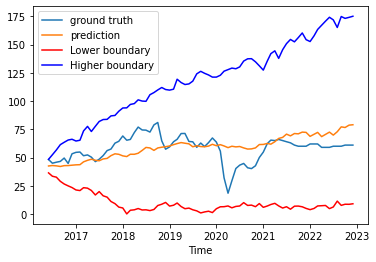

In [60]:
# нарисуйте пресказания
plt.plot(X1_test, y1_test, label = "ground truth")
plt.plot(X1_test, y_pred_lgt['prediction'], label = "prediction")
plt.plot(X1_test, y_pred_lgt['prediction_5'], c='red', label = "Lower boundary")
plt.plot(X1_test, y_pred_lgt['prediction_95'], c='blue', label = "Higher boundary")
plt.xlabel('Time')
plt.legend()
plt.show()

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [61]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
model_naive2_1 = NaiveForecaster(strategy='last')
model_naive2_1.fit(y2_train)

NaiveForecaster()

In [62]:
y_pred_naive2_1 = model_naive2_1.predict(X2_test.index)

In [63]:
# посчитайте метрики на test
mean_absolute_error(y2_test, y_pred_naive2_1)

1313.9157398394077

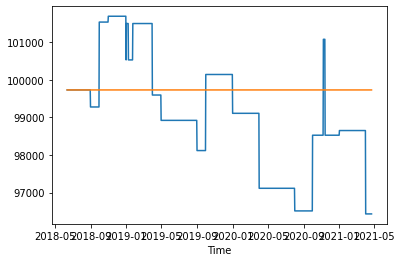

In [64]:
plt.plot(X2_test, y2_test)
plt.plot(X2_test, y_pred_naive2_1)
plt.xlabel('Time')
plt.show()

Модель получила большое MAE из-за выброса

In [65]:
model_naive2_2 = NaiveForecaster(strategy='last', sp=366)
model_naive2_2.fit(y2_train)

NaiveForecaster(sp=366)

In [66]:
y_pred_naive2_2 = model_naive2_2.predict(X2_test.index)

In [67]:
mean_absolute_error(y2_test, y_pred_naive2_2)

2144.685375854732

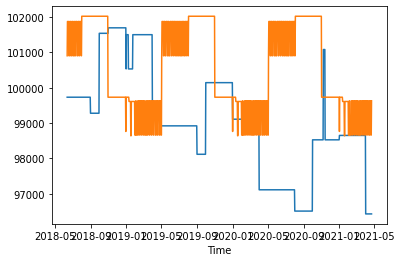

In [68]:
plt.plot(X2_test, y2_test)
plt.plot(X2_test, y_pred_naive2_2)
plt.xlabel('Time')
plt.show()

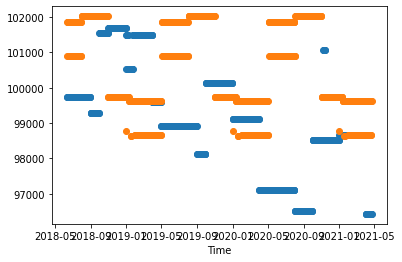

In [69]:
plt.scatter(X2_test, y2_test)
plt.scatter(X2_test, y_pred_naive2_2)
plt.xlabel('Time')
plt.show()

Какой-то баркод получается

In [70]:
#extra again
model_naive2_2_2 = NaiveForecaster(strategy="mean", window_length=700, sp=365)
model_naive2_2_2.fit(y2_train)

NaiveForecaster(sp=365, strategy='mean', window_length=700)

In [71]:
y_pred_naive2_2_2 = model_naive2_2_2.predict(X2_test.index)

In [72]:
mean_absolute_error(y2_test, y_pred_naive2_2_2)

2217.0806344754237

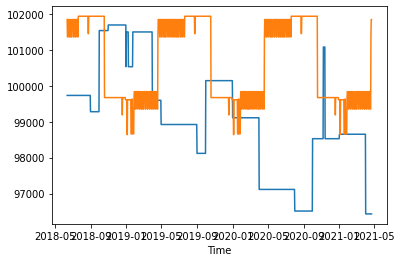

In [73]:
plt.plot(X2_test, y2_test)
plt.plot(X2_test, y_pred_naive2_2_2)
plt.xlabel('Time')
plt.show()

Прозошел bruh momento

### KTR из orbit (1 балл).



In [74]:
#from orbit.models.ktrlite import KTRLiteMAP
from orbit.models import KTRLite

# ваш код обучения моделей здесь
ktr = KTRLite(response_col='data', date_col='time', seasonality=365, seed=123)
ktr.fit(ts2_train)

In [75]:
# посчитайте метрики на test
y_pred_ktr = ktr.predict(ts2_test)

In [76]:
mean_absolute_error(y_pred_ktr['prediction'], y2_test)

2077.2637015742894

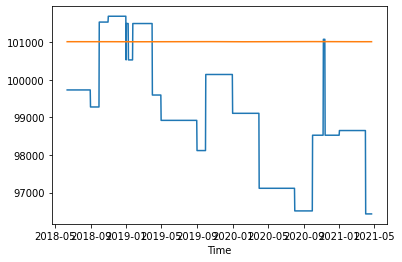

In [77]:
plt.plot(X2_test, y2_test)
plt.plot(X2_test, y_pred_ktr['prediction'])
plt.xlabel('Time')
plt.show()

### Phophet (1 балл).



In [78]:
from prophet import Prophet

# ваш код обучения моделей 
ts2_pro_train = ts2.rename(columns = {'time' : 'ds', 'data' : 'y'}) 
ts2_pro_test = ts2.rename(columns = {'time' : 'ds', 'data' : 'y'}) 
model_pro = Prophet()
model_pro.fit(ts2_pro_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
# посчитайте метрики на test
future = model_pro.make_future_dataframe(periods=365)
y_pred_pro = model_pro.predict(future)

In [80]:
y_pred_pro.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,100915.671727,101392.461772,102558.093930,100915.671727,100915.671727,1039.843050,1039.843050,1039.843050,16.334594,16.334594,16.334594,1023.508456,1023.508456,1023.508456,0.0,0.0,0.0,101955.514777
1,2007-01-02,100917.263488,101350.454982,102573.391270,100917.263488,100917.263488,1029.512867,1029.512867,1029.512867,25.308488,25.308488,25.308488,1004.204379,1004.204379,1004.204379,0.0,0.0,0.0,101946.776355
2,2007-01-03,100918.855249,101317.062104,102537.524856,100918.855249,100918.855249,1005.074494,1005.074494,1005.074494,22.208770,22.208770,22.208770,982.865723,982.865723,982.865723,0.0,0.0,0.0,101923.929742
3,2007-01-04,100920.447009,101280.351712,102543.063187,100920.447009,100920.447009,985.595329,985.595329,985.595329,25.754860,25.754860,25.754860,959.840469,959.840469,959.840469,0.0,0.0,0.0,101906.042338
4,2007-01-05,100922.038770,101255.961801,102510.820673,100922.038770,100922.038770,949.635668,949.635668,949.635668,14.111562,14.111562,14.111562,935.524106,935.524106,935.524106,0.0,0.0,0.0,101871.674438


In [81]:
mean_absolute_error(y_pred_pro[-1044:]['yhat'], y2_test)

1384.6928457984027

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

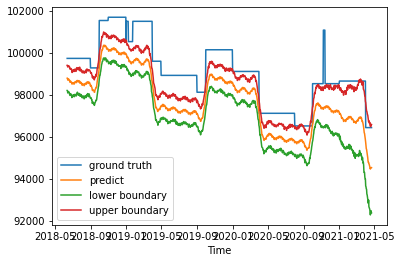

In [82]:
# нарисуйте пресказания
plt.plot(X2_test, y2_test, label="ground truth")
plt.plot(X2_test, y_pred_pro[-1044:]['yhat'], label="predict")
plt.plot(X2_test, y_pred_pro[-1044:]['yhat_lower'], label="lower boundary")
plt.plot(X2_test, y_pred_pro[-1044:]['yhat_upper'], label="upper boundary")
plt.xlabel('Time')
plt.legend()
plt.show()

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [83]:
# обучите классические модели ML
X_train = pd.DataFrame()
X_train['year'] = ts1_train['time'].dt.year
X_train['month'] = ts1_train['time'].dt.month

X_test = pd.DataFrame()
X_test['year'] = ts1_test['time'].dt.year
X_test['month'] = ts1_test['time'].dt.month
X_test.head()

,year,month
317,2016,6
318,2016,7
319,2016,8
320,2016,9
321,2016,10


In [84]:
y_train = ts1_train['data']
y_test = ts1_test['data']
y_train

0      21.251
1      19.813
2      18.387
3      16.612
4      16.352
        ...  
311    38.005
312    30.700
313    32.182
314    38.210
315    41.583
Name: data, Length: 316, dtype: float64

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Regression MAE = 49.90854202493567


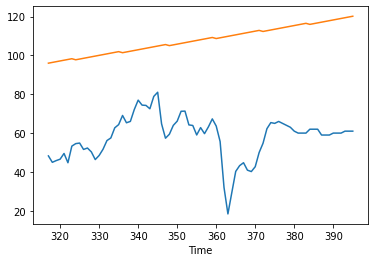

In [87]:
y_pred = regression.predict(X_test)

print(f"Regression MAE = {mean_absolute_error(y_test, y_pred)}")

plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred)
plt.xlabel('Time')
plt.show()

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

KNN MAE = 15.354521518987339


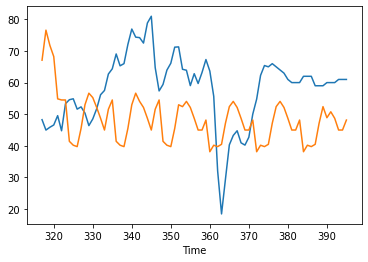

In [90]:
y_pred = knn.predict(X_test)

print(f"KNN MAE = {mean_absolute_error(y_test, y_pred)}")

plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred)
plt.xlabel('Time')
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

Boosting MAE = 23.791256584197132


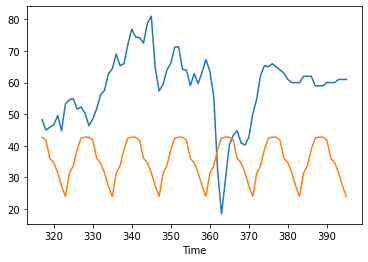

In [92]:
boosting = GradientBoostingRegressor()
boosting.fit(X_train, y_train)

y_pred = boosting.predict(X_test)

print(f"Boosting MAE = {mean_absolute_error(y_test, y_pred)}")

plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred)
plt.xlabel('Time')
plt.show()

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [94]:
polynomial = PolynomialFeatures(3)
poly_features_train = polynomial.fit_transform(X_train)
poly_features_test = polynomial.fit_transform(X_test)

Polynomial regression MAE = 43.3241778197711


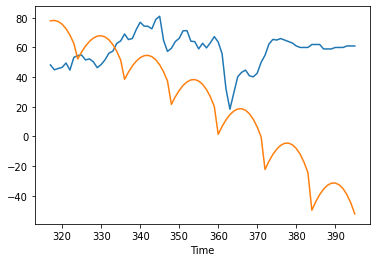

In [95]:
polynomial_regression = LinearRegression()
polynomial_regression.fit(poly_features_train, y_train)

y_pred = polynomial_regression.predict(poly_features_test)

print(f"Polynomial regression MAE = {mean_absolute_error(y_test, y_pred)}")

plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred)
plt.xlabel('Time')
plt.show()

All in all, knn обыграл все остальные модели

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [96]:
# ваш код модели на STAN и её обучения здесь

In [97]:
# посчитайте метрики на test

In [98]:
# нарисуйте предсказания